## Importing Libraries



In [1]:
# importing my custom module
import allcustommodules as sidra
import pandas as pd
import helper_performance_evaluater_over_folds as CV_folds
from sklearn.ensemble import RandomForestClassifier
import helper_traversal_train_test_splits as ttts

## Loading Data

In [2]:
filename = "D:/PRESC/PRESC/datasets/vehicles.csv"
dataset = pd.read_csv(filename)
dataset.head()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


### Exploring Dataset
General shape of data set, attributes list and categories list

In [3]:
sidra.data_stats(dataset)

=========== SOME STATS of Dataset ===========
Shape of the dataset: (846, 19)

List of attribute columns ['COMPACTNESS', 'CIRCULARITY', 'DISTANCE_CIRCULARITY', 'RADIUS_RATIO', 'PR.AXIS_ASPECT_RATIO', 'MAX.LENGTH_ASPECT_RATIO', 'SCATTER_RATIO', 'ELONGATEDNESS', 'PR.AXIS_RECTANGULARITY', 'MAX.LENGTH_RECTANGULARITY', 'SCALED_VARIANCE_MAJOR', 'SCALED_VARIANCE_MINOR', 'SCALED_RADIUS_OF_GYRATION', 'SKEWNESS_ABOUT_MAJOR', 'SKEWNESS_ABOUT_MINOR', 'KURTOSIS_ABOUT_MAJOR', 'KURTOSIS_ABOUT_MINOR', 'HOLLOWS_RATIO', 'Class']


List of Categories  ['van' 'saab' 'bus' 'opel'] 



#### Checking for anomalies and if upsampling of data is required 
Verifying that dataset is homogenous (that is there are almost equal number of datapoints belonging to each category)

In [4]:
dataset.describe()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.00000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,93.678487,44.861702,82.088652,168.940898,61.693853,8.567376,168.839243,40.933806,20.582742,147.998818,188.625296,439.911348,174.70331,72.462175,6.377069,12.599291,188.932624,195.632388
std,8.234474,6.169866,15.771533,33.472183,7.888251,4.601217,33.244978,7.811560,2.592138,14.515652,31.394837,176.692614,32.54649,7.486974,4.918353,8.931240,6.163949,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.00000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,146.250000,33.000000,19.000000,137.000000,167.000000,318.250000,149.00000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.500000,364.000000,173.00000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.00000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.00000,135.000000,22.000000,41.000000,206.000000,211.000000


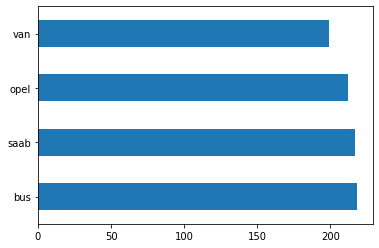

In [5]:
dataset['Class'].value_counts().plot(kind='barh')

## Tokenizing Target Column
Since random forest algo can only predict numbers we are tokenizing Class column/ Target values to numbers.

In [6]:
definitions = sidra.tokenize_target_column(dataset)

Updated tokenize 'Class' column - first 5 values
0    0
1    0
2    1
3    0
4    2
Name: Class, dtype: int64
Distinct Tokens used for converting Class column to integers
Index(['van', 'saab', 'bus', 'opel'], dtype='object')


## Training data and Target Label:
Now splitting dataset in training data and a target column

In [7]:
X, y = sidra.training_data_and_target_Label_split(dataset)
#X_train, X_test, y_train, y_test= sidra.train_data_test_data_split(X,y,0.03)


## Defining classifier

In [8]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)

## Displaying comparative performance score computed for a number of folds for a range of train/test data split in tabular form.

In [9]:
CV_data_split = ttts.performance_evaluater_over_train_test_splits(classifier,X, y, 5)
CV_data_split

,% of Training Data,% of Testing Data,No. of folds,Average metric Score
0,99,1,2,0.722819
1,99,1,3,0.765828
2,99,1,4,0.741840
3,99,1,5,0.743195
4,94,6,2,0.721998
5,94,6,3,0.743317
6,94,6,4,0.737059
7,94,6,5,0.729474
8,89,11,2,0.715424
9,89,11,3,0.732733


	========== For 96% train / 3% test ===========


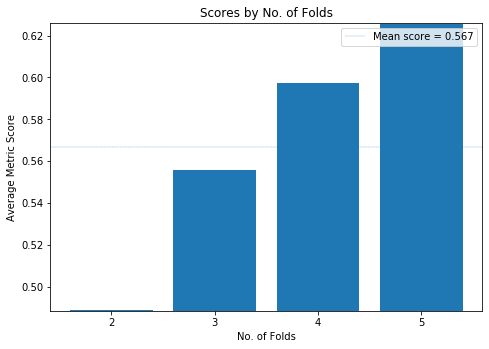

	========== For 91% train / 8% test ===========


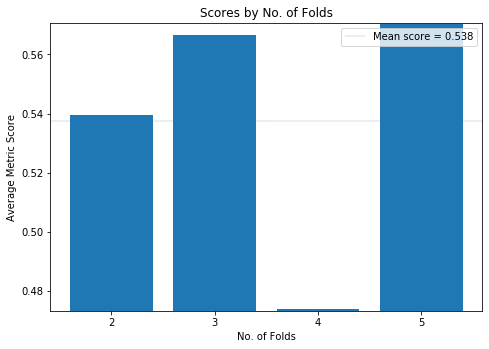

	========== For 86% train / 13% test ===========


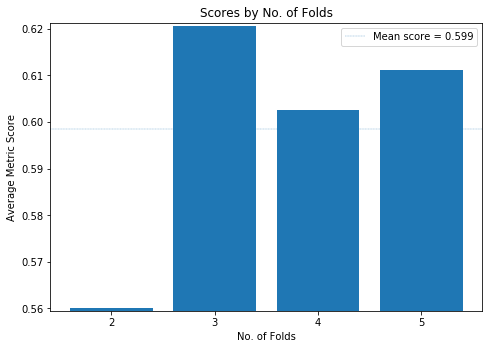

	========== For 81% train / 18% test ===========


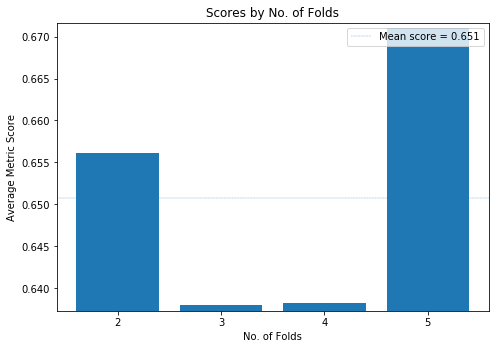

	========== For 76% train / 24% test ===========


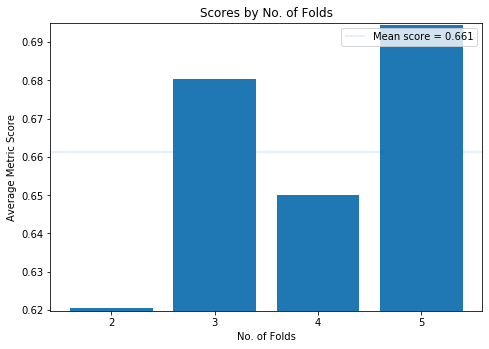

	========== For 71% train / 28% test ===========


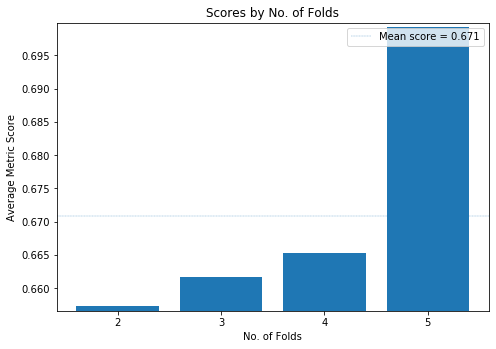

	========== For 66% train / 34% test ===========


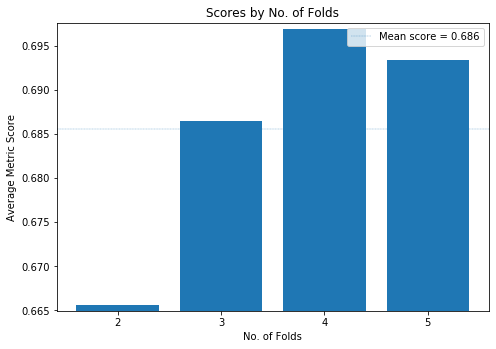

	========== For 61% train / 38% test ===========


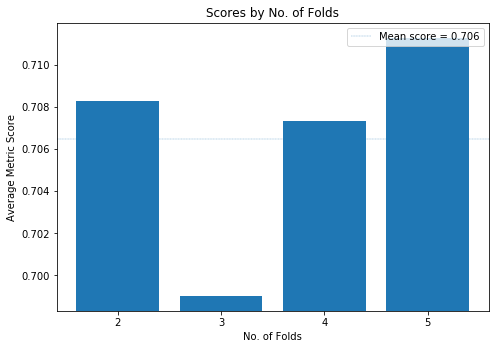

	========== For 56% train / 43% test ===========


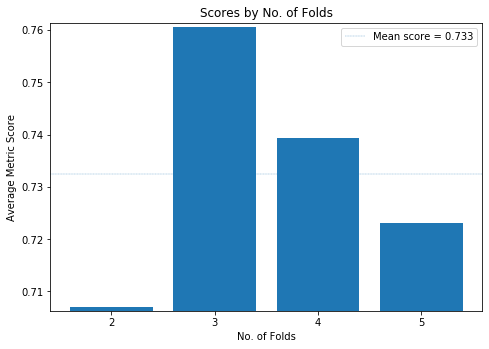

	========== For 51% train / 49% test ===========


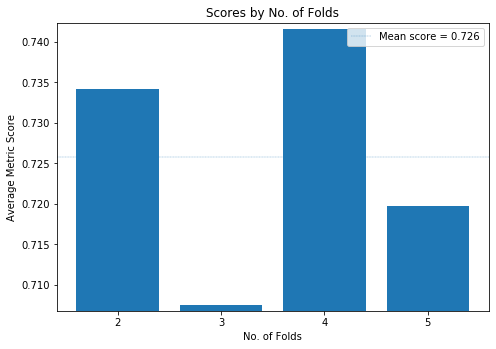

	========== For 46% train / 54% test ===========


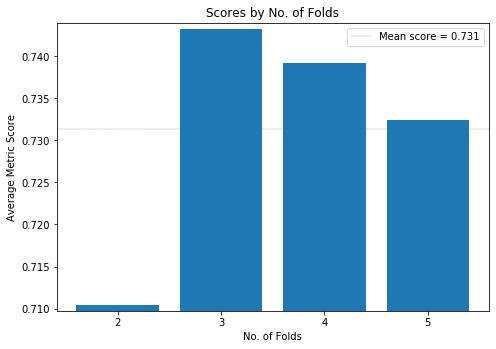

	========== For 41% train / 59% test ===========


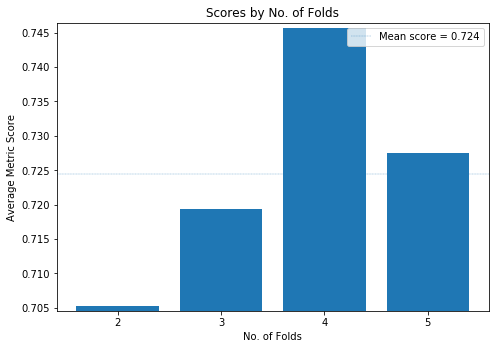

	========== For 36% train / 63% test ===========


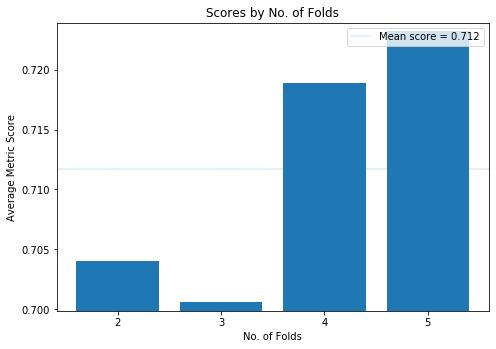

	========== For 31% train / 69% test ===========


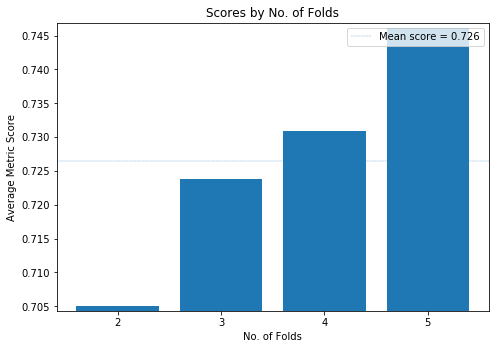

	========== For 26% train / 74% test ===========


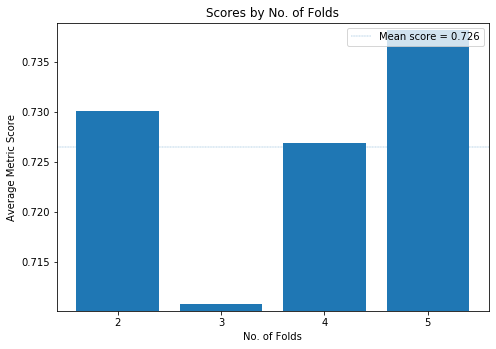

	========== For 21% train / 79% test ===========


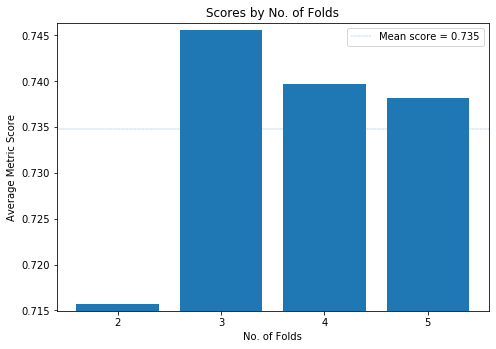

	========== For 16% train / 84% test ===========


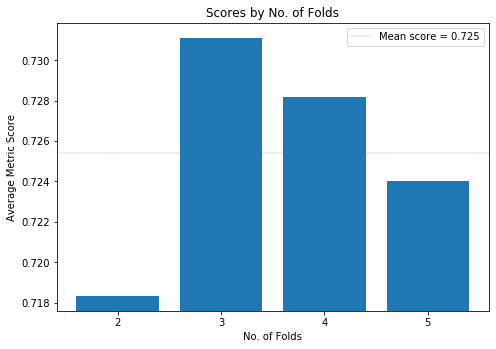

	========== For 11% train / 89% test ===========


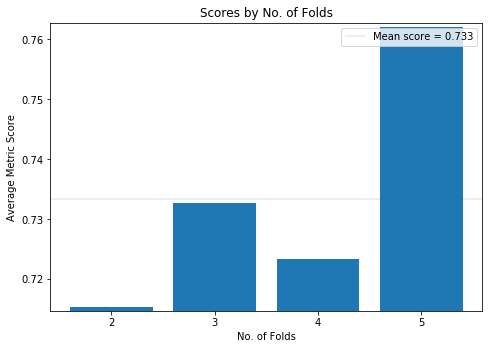

	========== For 6% train / 94% test ===========


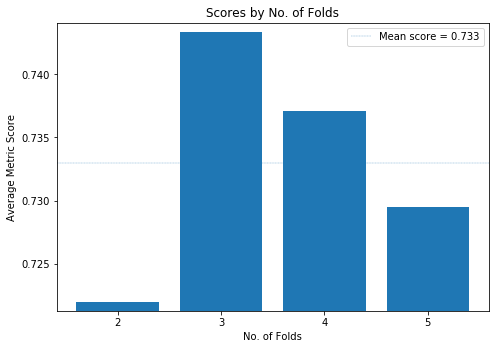

	========== For 1% train / 99% test ===========


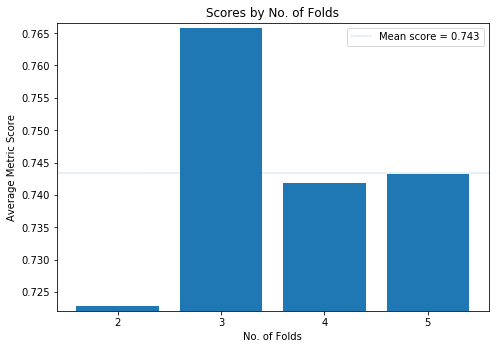

In [10]:
ttts.visualising_performance_evaluater_over_splits(CV_data_split)